In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
#Who are the primary clients using this online process?
#Are the primary clients younger or older, new or long-standing?

In [12]:
url = "https://raw.githubusercontent.com/ross167/vanguard-ab-test/main/database/clean/df_final_demo.csv"

df = pd.read_csv(url)

In [13]:
df.head()

,Unnamed: 0,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [14]:
bins = [18, 26, 36, 46, 56, 66, np.inf]

labels = [
    "Young Adults",
    "Early Adulthood",
    "Mid Adulthood (Early)",
    "Mid Adulthood",
    "Late Adulthood",
    "Older Adults"
]

df["age_group"] = pd.cut(
    df["clnt_age"],
    bins=bins,
    labels=labels,
    right=False
)

df["age_group"].value_counts()

age_group
Mid Adulthood            14526
Early Adulthood          14426
Late Adulthood           14342
Mid Adulthood (Early)    11879
Older Adults              8072
Young Adults              6975
Name: count, dtype: int64

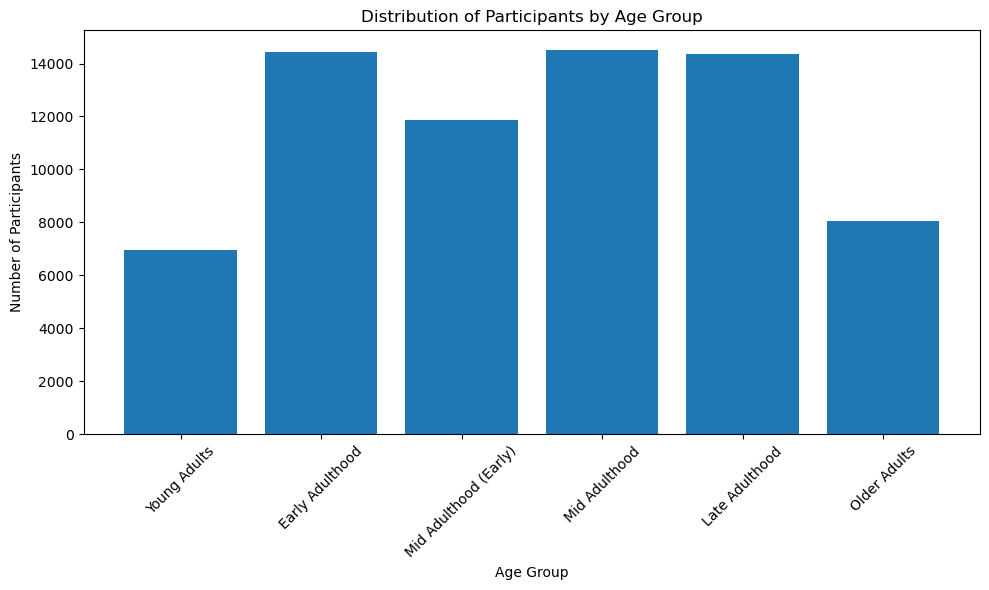

In [ ]:
age_counts = df["age_group"].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(age_counts.index, age_counts.values)
plt.xlabel("Age Group")
plt.ylabel("Number of Participants")
plt.title("Distribution of Participants by Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

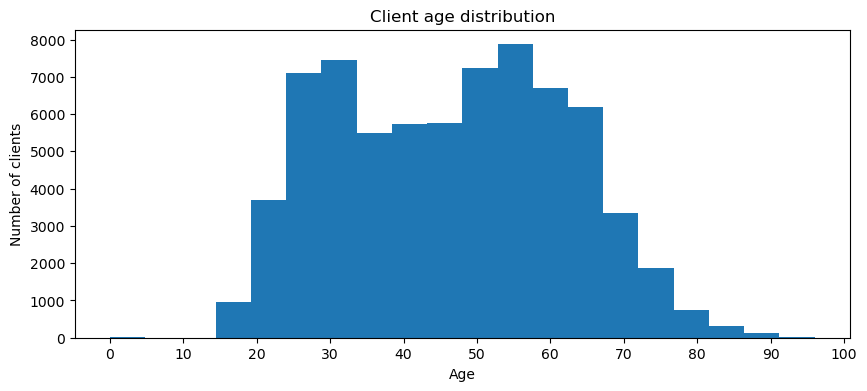

In [8]:
plt.figure(figsize=(10,4))
plt.hist(df["clnt_age"].dropna(), bins=20)   # try 20, 30, 40 bins
plt.xlabel("Age")
plt.xticks(np.arange(0, 101, 10))  # 👈 forces 30 to appear
plt.ylabel("Number of clients")
plt.title("Client age distribution")
plt.show()

In [ ]:
#Who are the primary clients using this online process?


In [34]:
print(f"Percentage of Male clients: {df['gendr'].value_counts(normalize=True)['M']:.2%}")
print(f"Percentage of Female clients: {df['gendr'].value_counts(normalize=True)['F']:.2%}")
print(f"Percentage of clients with U gender: {df['gendr'].value_counts(normalize=True)['U']:.2%}")

Percentage of Male clients: 33.60%
Percentage of Female clients: 32.21%
Percentage of clients with U gender: 34.19%


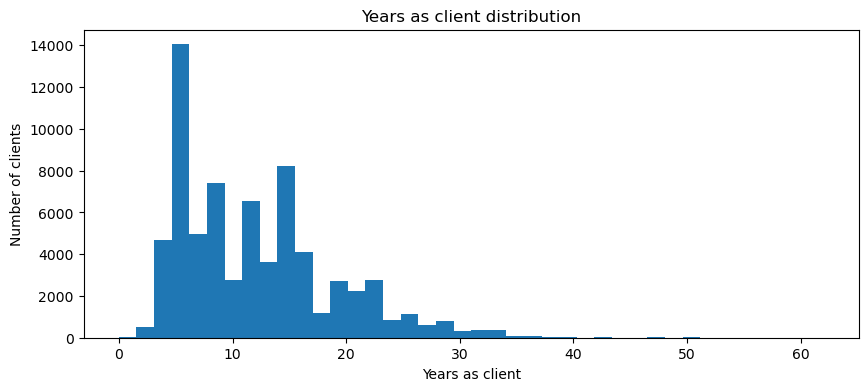

In [ ]:
plt.figure(figsize=(10,4))
plt.hist(df["clnt_tenure_yr"], bins=40)  
plt.xlabel("Years as client")
plt.ylabel("Number of clients")
plt.title("Years as client distribution")
plt.show()

In [31]:
print(f"Average number of accounts: {df['num_accts'].mean()}")

Average number of accounts: 2.25508079706553
